## Bài tập thực hành 2
Thực hiện thống kê mô tả trên tập dữ liệu về bệnh tiểu đường. Dữ liệu lấy tại
https://www.kaggle.com/code/vincentlugat/pima-indians-diabetes-eda-prediction-0-906

## 1. Khai báo thư viện (Load Libraries)

In [1]:
# Load libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy import stats
import seaborn as sns
from IPython import display
import warnings
warnings.filterwarnings("ignore")

## 2. Nạp dữ liệu (Load Dataset)

In [2]:
# Load dataset
df = pd.read_csv("diabetes.csv")
print("Kích thước dữ liệu:", df.shape)
display.display(df.head())

Kích thước dữ liệu: (768, 9)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


## 3. Thống kê mô tả (Descriptive Statistics)

In [3]:
# shape
print(f'+ Shape: {df.shape}')
# types
print(f'+ Data Types: \n{df.dtypes}')
# head, tail
print(f'+ Contents: ')
display.display(df.head(5))
display.display(df.tail(5))
# info
df.info()

+ Shape: (768, 9)
+ Data Types: 
Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object
+ Contents: 


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


#### 3.2. **Kiểm tra missing values & duplicates**
+ Mục tiêu: Đảm bảo dữ liệu đầy đủ, không có ô trống.
+ Mục tiêu: Loại bỏ các dòng trùng hoàn toàn (nếu có).

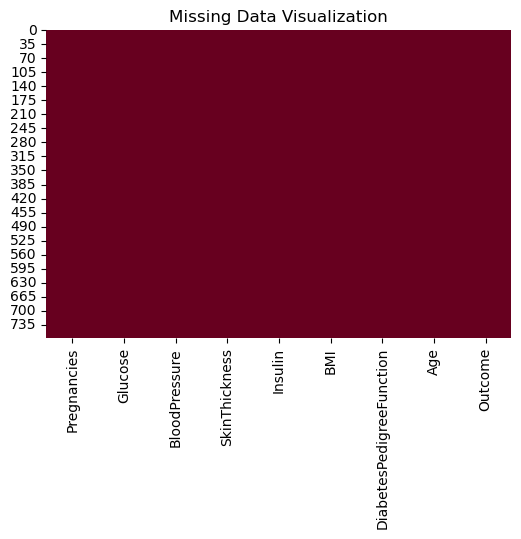

Missing Data Counts:
 Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


In [4]:
# Kiểm tra giá trị thiếu 
# Tổng số giá trị thiếu từng cột
missing_data = df.isnull().sum()

# Trực quan hóa missing data
plt.figure(figsize=(6, 4))
sns.heatmap(df.isnull(), cmap='RdBu', cbar=False)
plt.title('Missing Data Visualization')
plt.show()

# Hiển thị số lượng dữ liệu bị thiếu
print("Missing Data Counts:\n", missing_data)

In [5]:
# Kiểm tra trùng lặp
# Phát hiện số lượng dòng trùng lặp
duplicates_count = df.duplicated().sum()
print(f"Số lượng dòng trùng lặp phát hiện được: {duplicates_count}")
if duplicates_count > 0:
    display.display(df[df.duplicated()])

# Loại bỏ các dòng trùng lặp
df = df.drop_duplicates()

# Kiểm tra lại sau khi loại bỏ
print(f"Số dòng còn lại sau khi loại bỏ trùng lặp: {df.shape[0]}")

Số lượng dòng trùng lặp phát hiện được: 0
Số dòng còn lại sau khi loại bỏ trùng lặp: 768


#### 3.3. **Mô tả thống kê các biến định lượng**
Mục tiêu: Tính các chỉ số thống kê cơ bản:
+  Mean, Median, Mode, Variance, Std Deviation,
    Range, Q1 (25%), Q2 (50%), Q3 (75%), IQR

In [6]:
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns

desc_stats = pd.DataFrame(index=numeric_cols, columns=[
    'Mean', 'Median', 'Mode', 'Variance', 'Std Deviation',
    'Range', 'Q1 (25%)', 'Q2 (50%)', 'Q3 (75%)', 'IQR'])

for col in numeric_cols:
    desc_stats.loc[col, 'Mean'] = df[col].mean()
    desc_stats.loc[col, 'Median'] = df[col].median()
    desc_stats.loc[col, 'Mode'] = df[col].mode()[0]
    desc_stats.loc[col, 'Variance'] = df[col].var()
    desc_stats.loc[col, 'Std Deviation'] = df[col].std()
    desc_stats.loc[col, 'Range'] = df[col].max() - df[col].min()
    desc_stats.loc[col, 'Q1 (25%)'] = np.percentile(df[col], 25)
    desc_stats.loc[col, 'Q2 (50%)'] = np.percentile(df[col], 50)
    desc_stats.loc[col, 'Q3 (75%)'] = np.percentile(df[col], 75)
    desc_stats.loc[col, 'IQR'] = desc_stats.loc[col, 'Q3 (75%)'] - desc_stats.loc[col, 'Q1 (25%)']

desc_stats = desc_stats.round(3)
desc_stats = desc_stats.reset_index().rename(columns={'index': 'Attribute'})
desc_stats.index = range(1, len(desc_stats) + 1)

from IPython.display import display
display(desc_stats)

,Attribute,Mean,Median,Mode,Variance,Std Deviation,Range,Q1 (25%),Q2 (50%),Q3 (75%),IQR
1,Pregnancies,3.845052,3.0,1,11.354056,3.369578,17,1.0,3.0,6.0,5.0
2,Glucose,120.894531,117.0,99,1022.248314,31.972618,199,99.0,117.0,140.25,41.25
3,BloodPressure,69.105469,72.0,70,374.647271,19.355807,122,62.0,72.0,80.0,18.0
4,SkinThickness,20.536458,23.0,0,254.473245,15.952218,99,0.0,23.0,32.0,32.0
5,Insulin,79.799479,30.5,0,13281.180078,115.244002,846,0.0,30.5,127.25,127.25
6,BMI,31.992578,32.0,32.0,62.159984,7.88416,67.1,27.3,32.0,36.6,9.3
7,DiabetesPedigreeFunction,0.471876,0.3725,0.254,0.109779,0.331329,2.342,0.24375,0.3725,0.62625,0.3825
8,Age,33.240885,29.0,22,138.303046,11.760232,60,24.0,29.0,41.0,17.0
9,Outcome,0.348958,0.0,0,0.227483,0.476951,1,0.0,0.0,1.0,1.0


#### 3.4. **Phân tích phân bố của biến phân loại Outcome**
+ Mục tiêu: Xem dữ liệu có bị mất cân bằng hay không

Outcome
0    500
1    268
Name: count, dtype: int64


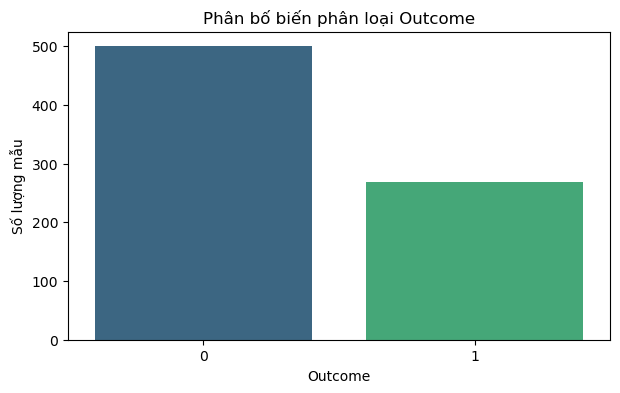

In [7]:
Outcome_counts = df['Outcome'].value_counts().sort_index()
print(Outcome_counts)

plt.figure(figsize=(7,4))
sns.countplot(x='Outcome', data=df, palette='viridis')
plt.title("Phân bố biến phân loại Outcome")
plt.xlabel("Outcome")
plt.ylabel("Số lượng mẫu")
plt.show()

#### 3.5. **Kiểm tra phân bố của các biến định lượng**
+ Mục tiêu: Quan sát dạng phân bố (chuẩn, lệch trái, lệch phải).

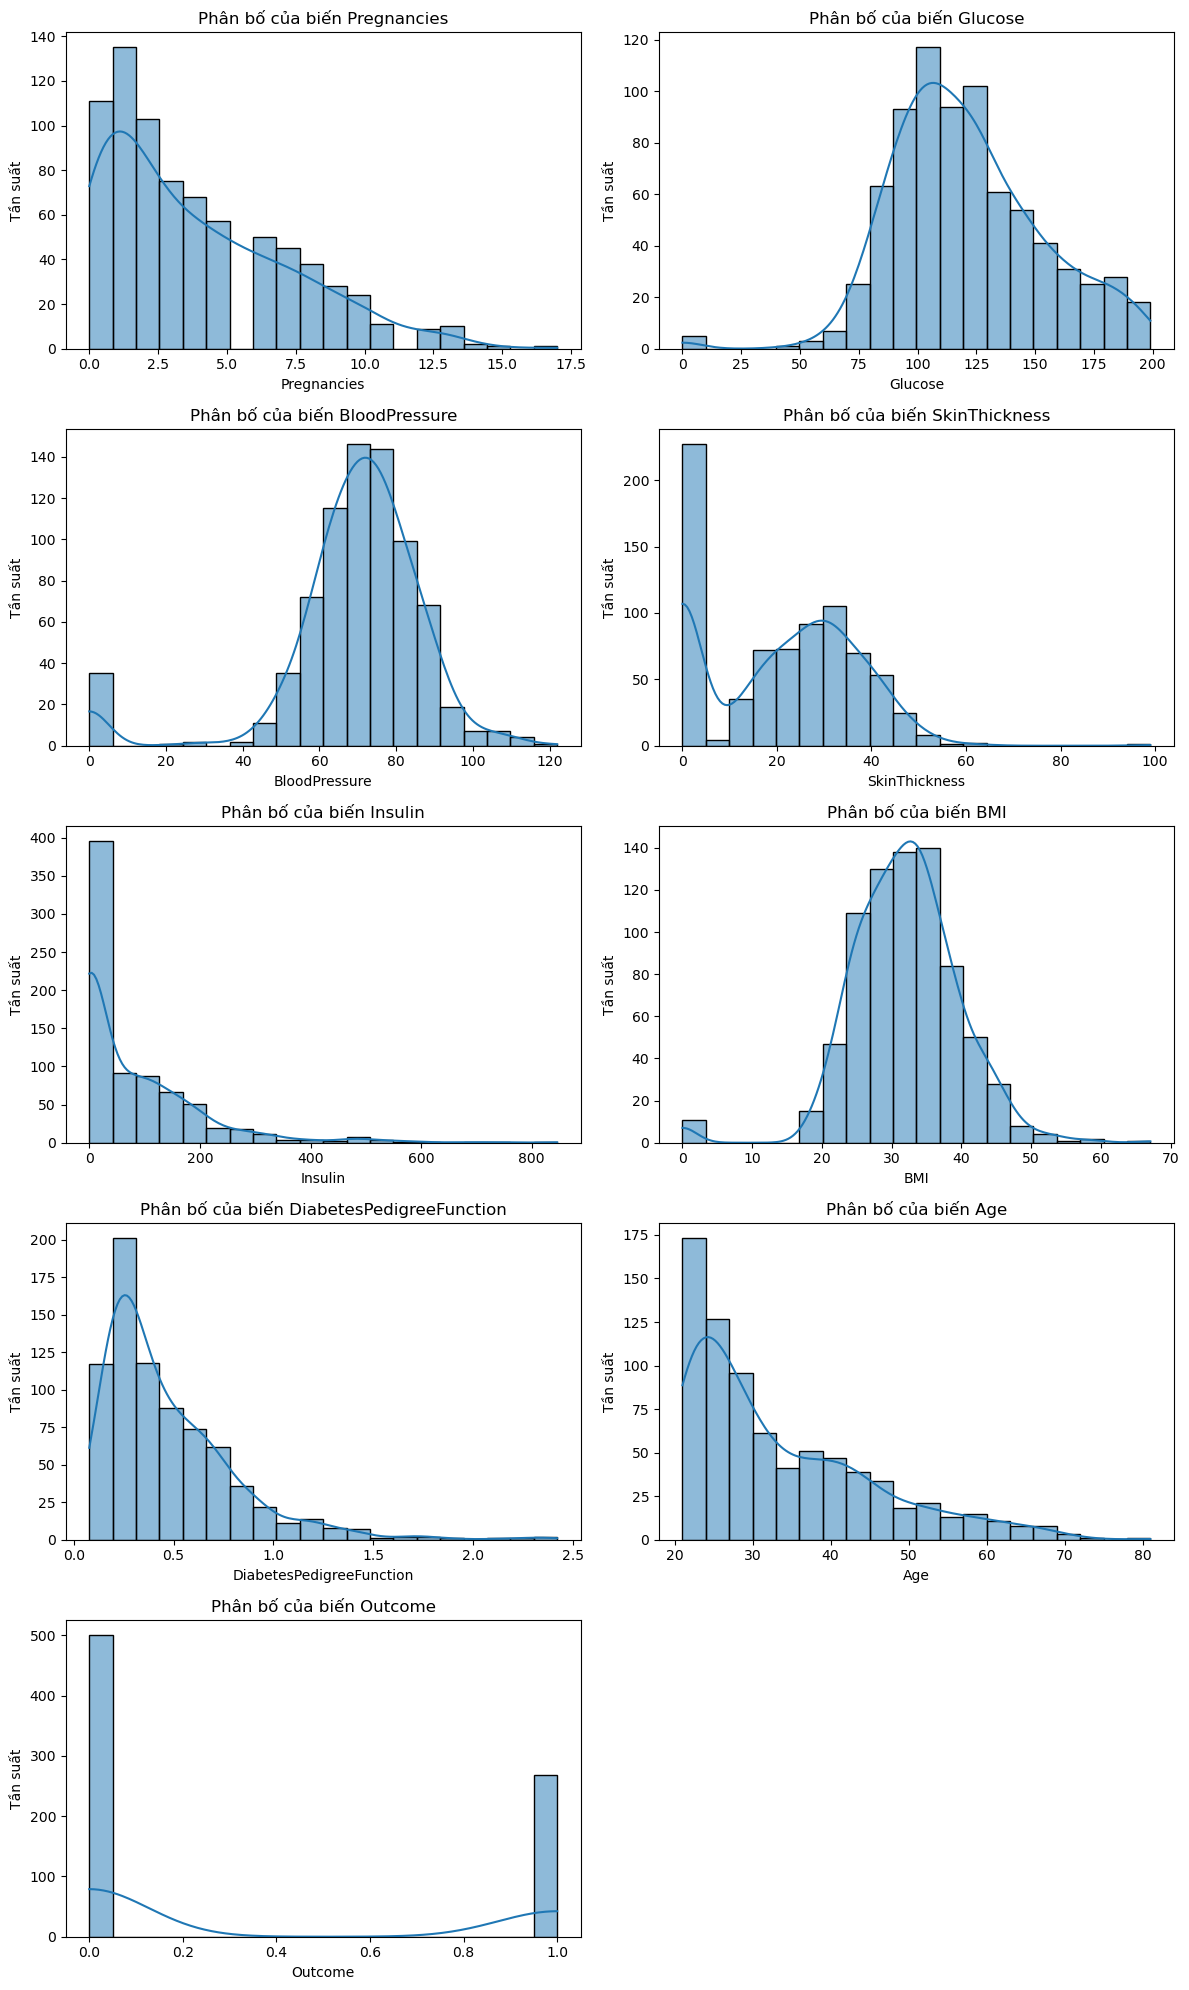

In [8]:
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns

n_cols = 2
n_rows = (len(numeric_cols) + 1) // n_cols
fig, axes = plt.subplots(n_rows, n_cols, figsize=(12, 4 * n_rows))
axes = axes.flatten()

for i, col in enumerate(numeric_cols):
    sns.histplot(df[col], kde=True, bins=20, ax=axes[i])
    axes[i].set_title(f"Phân bố của biến {col}")
    axes[i].set_xlabel(col)
    axes[i].set_ylabel("Tần suất")

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()